In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', as_frame=False, cache=False, parser='auto')

X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# test_size and random_state need to be experimentally determined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
import matplotlib.pyplot as plt

def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""

    # Slice X, y to be 5 images, reshape back into matrices
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

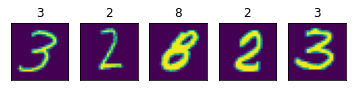

In [5]:
plot_example(X_train, y_train)

In [6]:
from keras import layers

In [65]:
# hmmm
'''
model = keras.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='sigmoid'),

])
'''

In [67]:
model = keras.Sequential([
    
    layers.Flatten(),
    layers.Dense(784),
    layers.Dense(10, activation='sigmoid'),

])

In [68]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [76]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
)

Epoch 1/10
1641/1641 [==============================] - 9s 6ms/step - loss: 5.3969 - accuracy: 0.8762 - val_loss: 5.4789 - val_accuracy: 0.8835
Epoch 2/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.2793 - accuracy: 0.8758 - val_loss: 7.5696 - val_accuracy: 0.8493
Epoch 3/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.3068 - accuracy: 0.8782 - val_loss: 7.6812 - val_accuracy: 0.8371
Epoch 4/10
1641/1641 [==============================] - 9s 6ms/step - loss: 5.3863 - accuracy: 0.8771 - val_loss: 6.3465 - val_accuracy: 0.8604
Epoch 5/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.4311 - accuracy: 0.8777 - val_loss: 5.6193 - val_accuracy: 0.8883
Epoch 6/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.4071 - accuracy: 0.8786 - val_loss: 5.0902 - val_accuracy: 0.8955
Epoch 7/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.2633 - accuracy: 0.8801 - val_loss: 7.3114 - val_accuracy:

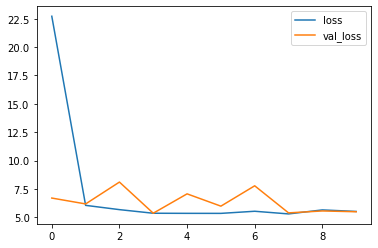

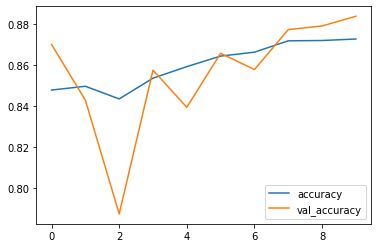

In [70]:
import pandas as pd

history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [1]:
model.predict(X_train[0])

NameError: name 'model' is not defined